In [1]:
!apt-get update
# Download Java Virtual Machine (JVM)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [1,084 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,34

In [2]:
!python --version

Python 3.10.12


In [3]:
!pwd

/content


In [4]:
# Download Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
# Unzip the file
!tar xf spark-3.2.1-bin-hadoop3.2.tgz

In [5]:
#Adds pyspark to sys.path at runtime
!pip install -q findspark

In [6]:
# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/spark-3.2.1-bin-hadoop3.2'

In [7]:
!ls

drive  sample_data  spark-3.2.1-bin-hadoop3.2  spark-3.2.1-bin-hadoop3.2.tgz


In [8]:
import findspark
findspark.init()

In [9]:
findspark.find()

'/content/spark-3.2.1-bin-hadoop3.2'

In [10]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=700104c960b9546f27711d0d4042ca1657cbcffc5d0297c91e4120763bb11d72
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [11]:
from pyspark import SparkConf
from pyspark.context import SparkContext

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [12]:
from pyspark.sql import SparkSession  #Connect spark code on top of spark engine
spark = SparkSession.builder.master("local[4]").getOrCreate()

In [13]:
import sys
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import Row, StructField, StructType, StringType, IntegerType
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
sqlContext = SQLContext(sc)
sqlContext

/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [15]:
spark = SparkSession.builder.appName("pySparkdf").getOrCreate()

In [16]:
spark = SparkSession.builder.appName("pySpark csv df").getOrCreate()

In [17]:
df = spark.read.csv(header=True, inferSchema= True, path= "/content/drive/MyDrive/LifeExpectancy.csv")

df.printSchema()
df.show(5)

root
 |-- Country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Adult_Mortality: double (nullable = true)
 |-- infant_deaths: integer (nullable = true)
 |-- Alcohol: double (nullable = true)
 |-- percentage_expenditure: double (nullable = true)
 |-- Hepatitis_B: double (nullable = true)
 |-- Measles: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- under-five_deaths: integer (nullable = true)
 |-- Polio: double (nullable = true)
 |-- Total_expenditure: double (nullable = true)
 |-- Diphtheria: double (nullable = true)
 |-- HIV/AIDS: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- Population: double (nullable = true)
 |-- thinness_1: double (nullable = true)
 |-- thinness_5: double (nullable = true)
 |-- Income_composition_of_resources: double (nullable = true)
 |-- Schooling: double (nullable = true)
 |-- Life_Expectancy: double (nullable = true)

+-----------+----+----------+---------------+-

In [18]:
# Check null values for all columns
for column in df.columns:
    null_count = df.filter(df[column].isNull()).count()
    print(f"Column: {column}, Null Count: {null_count}")

Column: Country, Null Count: 0
Column: Year, Null Count: 0
Column: Status, Null Count: 0
Column: Adult_Mortality, Null Count: 0
Column: infant_deaths, Null Count: 0
Column: Alcohol, Null Count: 0
Column: percentage_expenditure, Null Count: 0
Column: Hepatitis_B, Null Count: 0
Column: Measles, Null Count: 0
Column: BMI, Null Count: 0
Column: under-five_deaths, Null Count: 0
Column: Polio, Null Count: 0
Column: Total_expenditure, Null Count: 0
Column: Diphtheria, Null Count: 0
Column: HIV/AIDS, Null Count: 0
Column: GDP, Null Count: 0
Column: Population, Null Count: 0
Column: thinness_1, Null Count: 0
Column: thinness_5, Null Count: 0
Column: Income_composition_of_resources, Null Count: 0
Column: Schooling, Null Count: 0
Column: Life_Expectancy, Null Count: 0


In [19]:
data = df.select('Country', 'Year', 'Alcohol', 'GDP', 'Population')

In [20]:
import matplotlib.pyplot as plt

In [21]:
def histogram(df, col, bins=10, xname=None, yname=None):

    '''
    This function makes a histogram from spark dataframe named
    df for column name col.
    '''

    # Calculating histogram in Spark
    vals = df.select(col).rdd.flatMap(lambda x: x).histogram(bins)

    # Preprocessing histogram points and locations
    width = vals[0][1] - vals[0][0]
    loc = [vals[0][0] + (i+1) * width for i in range(len(vals[1]))]

    # Making a bar plot
    plt.bar(loc, vals[1], width=width)
    plt.xlabel(col)
    plt.ylabel(yname)
    plt.show()

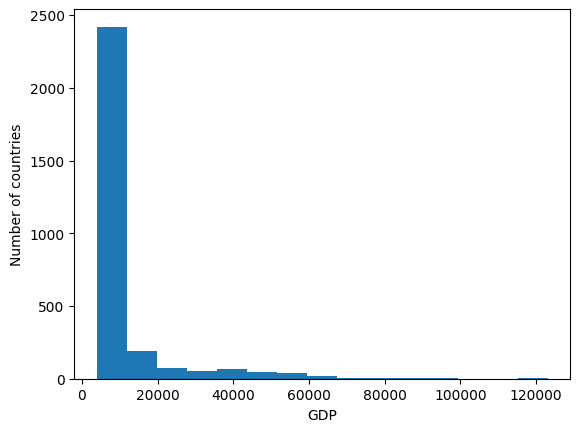

In [22]:
histogram(data, 'GDP', bins=15, yname='Number of countries')

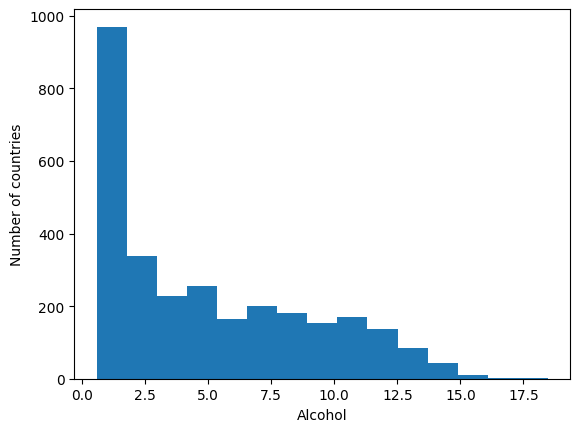

In [23]:
histogram(data, 'Alcohol', bins=15, yname='Number of countries')

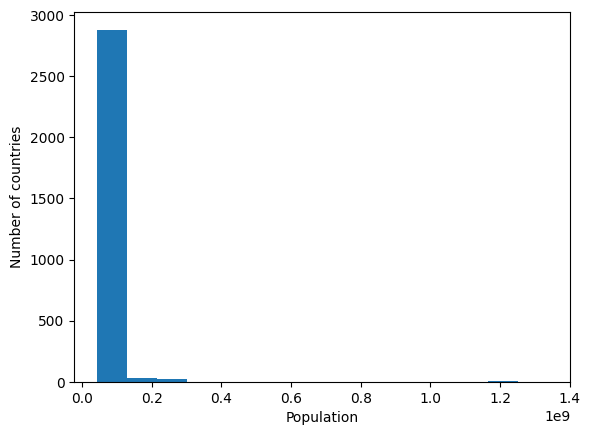

In [24]:
histogram(data, 'Population', bins=15, yname='Number of countries')

In [25]:
data.select('Population').summary().show()

+-------+-------------------+
|summary|         Population|
+-------+-------------------+
|  count|               2938|
|   mean|  9923150.280612664|
| stddev|5.407585708076545E7|
|    min|                0.0|
|    25%|             5867.0|
|    50%|           539141.0|
|    75%|          4586897.0|
|    max|      1.293859294E9|
+-------+-------------------+



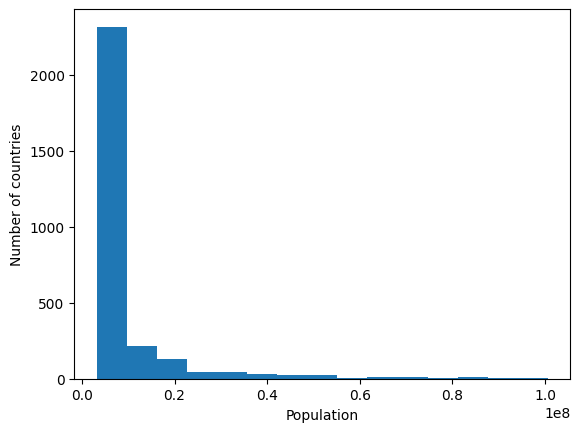

In [26]:
histogram(data.filter(df['Population']<100000000), \
          'Population', bins=15, yname='Number of countries')

In [27]:
def lineplot(df, x, y, measure='mean'):

    '''
    This function makes a line plot from Spark dataframe df with
    independent variable x and averaged over y.
    '''

    if measure == 'mean':

        # Grouping the dataframe by x and averaging over y
        # Sorting is important because Spark shuffle the values
        # when doing the calculation

        pd_df = df.groupBy(x).mean(y).toPandas().sort_values(by=x)

        # Making plot using pandas
        pd_df.plot(x, 'avg({})'.format(y), legend=False)

    elif measure == 'total':
        pd_df = df.groupBy(x).sum(y).toPandas().sort_values(by=x)
        pd_df.plot(x, 'sum({})'.format(y), legend=False)

    elif measure == 'count':
        pd_df = df.groupBy(x).count().toPandas().sort_values(by=x)
        pd_df.plot(x, 'count', legend=False)

    plt.ylabel(y)
    plt.show()

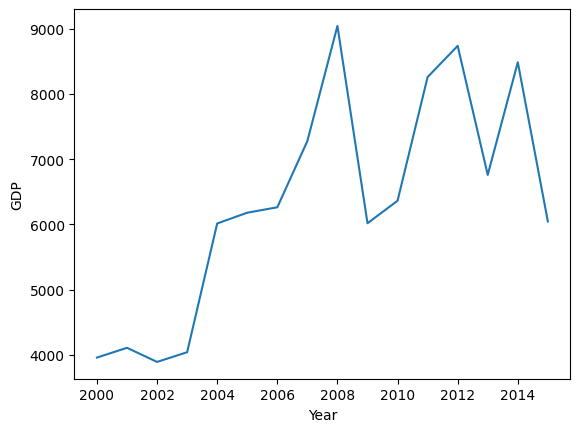

In [28]:
lineplot(data, 'Year', 'GDP', measure='mean')

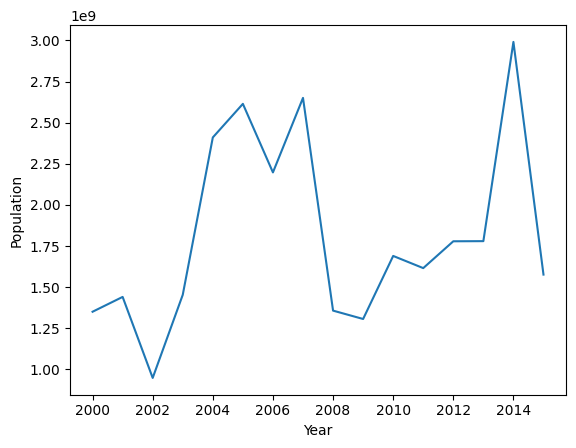

In [29]:
lineplot(data, 'Year', 'Population', measure='total')

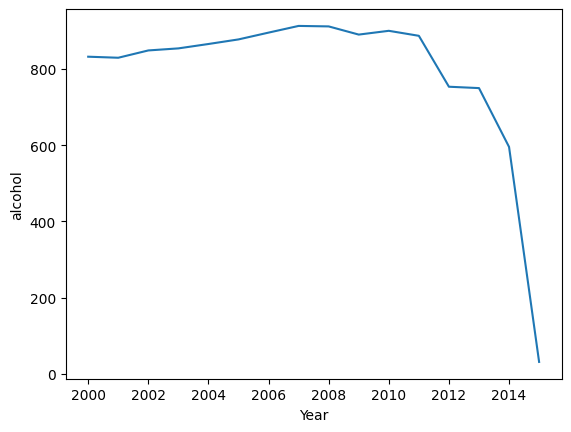

In [30]:
lineplot(data, 'Year', 'alcohol', measure='total')

In [31]:
def barplot(df, col, lim=10, yname=None):

    '''
    This function makes a bar plot for the Spark dataframe df
    for categorical column col only selecting top categories
    as specified by lim.
    '''

    # Grouping by the categories, counting on each categories
    # and ordering them by the count
    classes = df.groupBy(col).count().orderBy('count', ascending=False)

    # Take first 'lim' number of rows and convert to pandas
    pd_df = classes.limit(lim).toPandas()

    # Making plot
    pd_df.plot(kind='bar', x=col, legend=False)
    plt.ylabel(yname)
    plt.show()

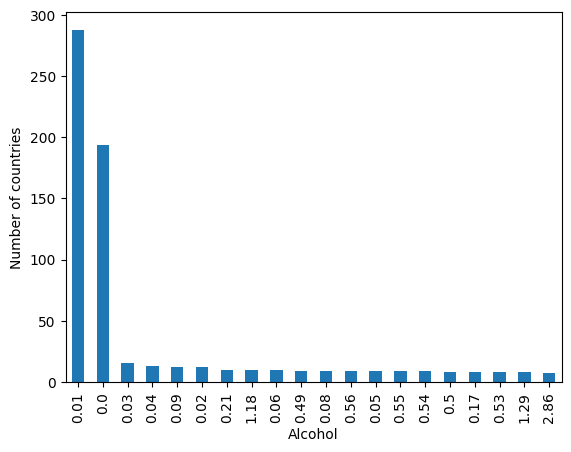

In [32]:
barplot(data, 'Alcohol', lim=20, yname='Number of countries')

In [33]:
def boxplot(data, col, group_by, samp_size=10000):

    '''
    This function makes a box plot for a Spark dataframe df
    grouping them by a column name called group_by and their
    aggrigate on another column called col.
    '''

    # Selecting sample for the large dataset
    # For samll data sampling is not done. For the large data
    # sample size is the specified number.

    true_samp_size = min(samp_size/df.count(), 1.0)
    pd_df = df.sample(False, true_samp_size).toPandas()

    # Making plot
    pd_df.boxplot(col, by=group_by, figsize=(8, 5))
    plt.ylabel(col)
#     plt.xticks([2000, 2005, 2010, 2015])
    plt.title(None)
    plt.show()

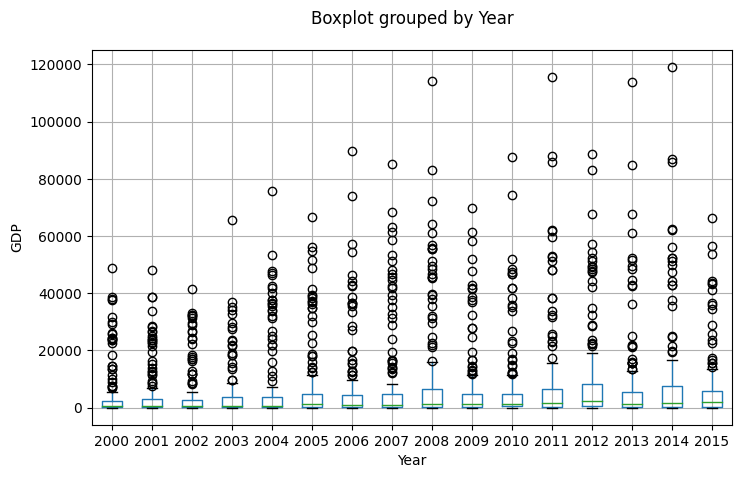

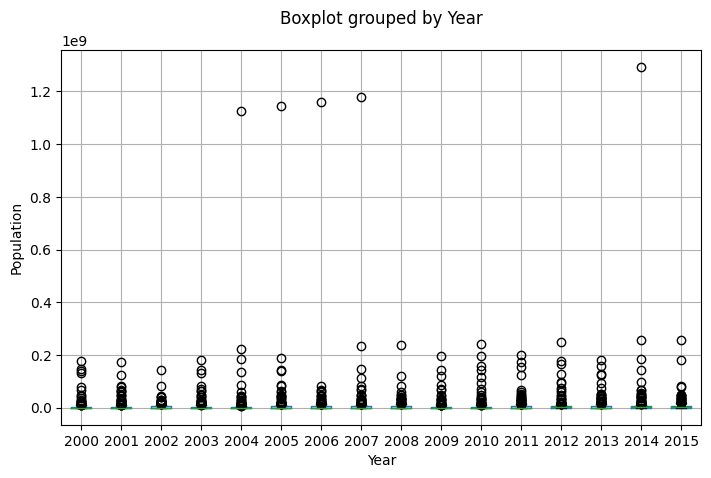

In [34]:
boxplot(data, 'GDP', 'Year')
boxplot(data.filter(df['Population']<10000000), 'Population', 'Year')


In [35]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-36-bae95436b57b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.toPandas().corr()


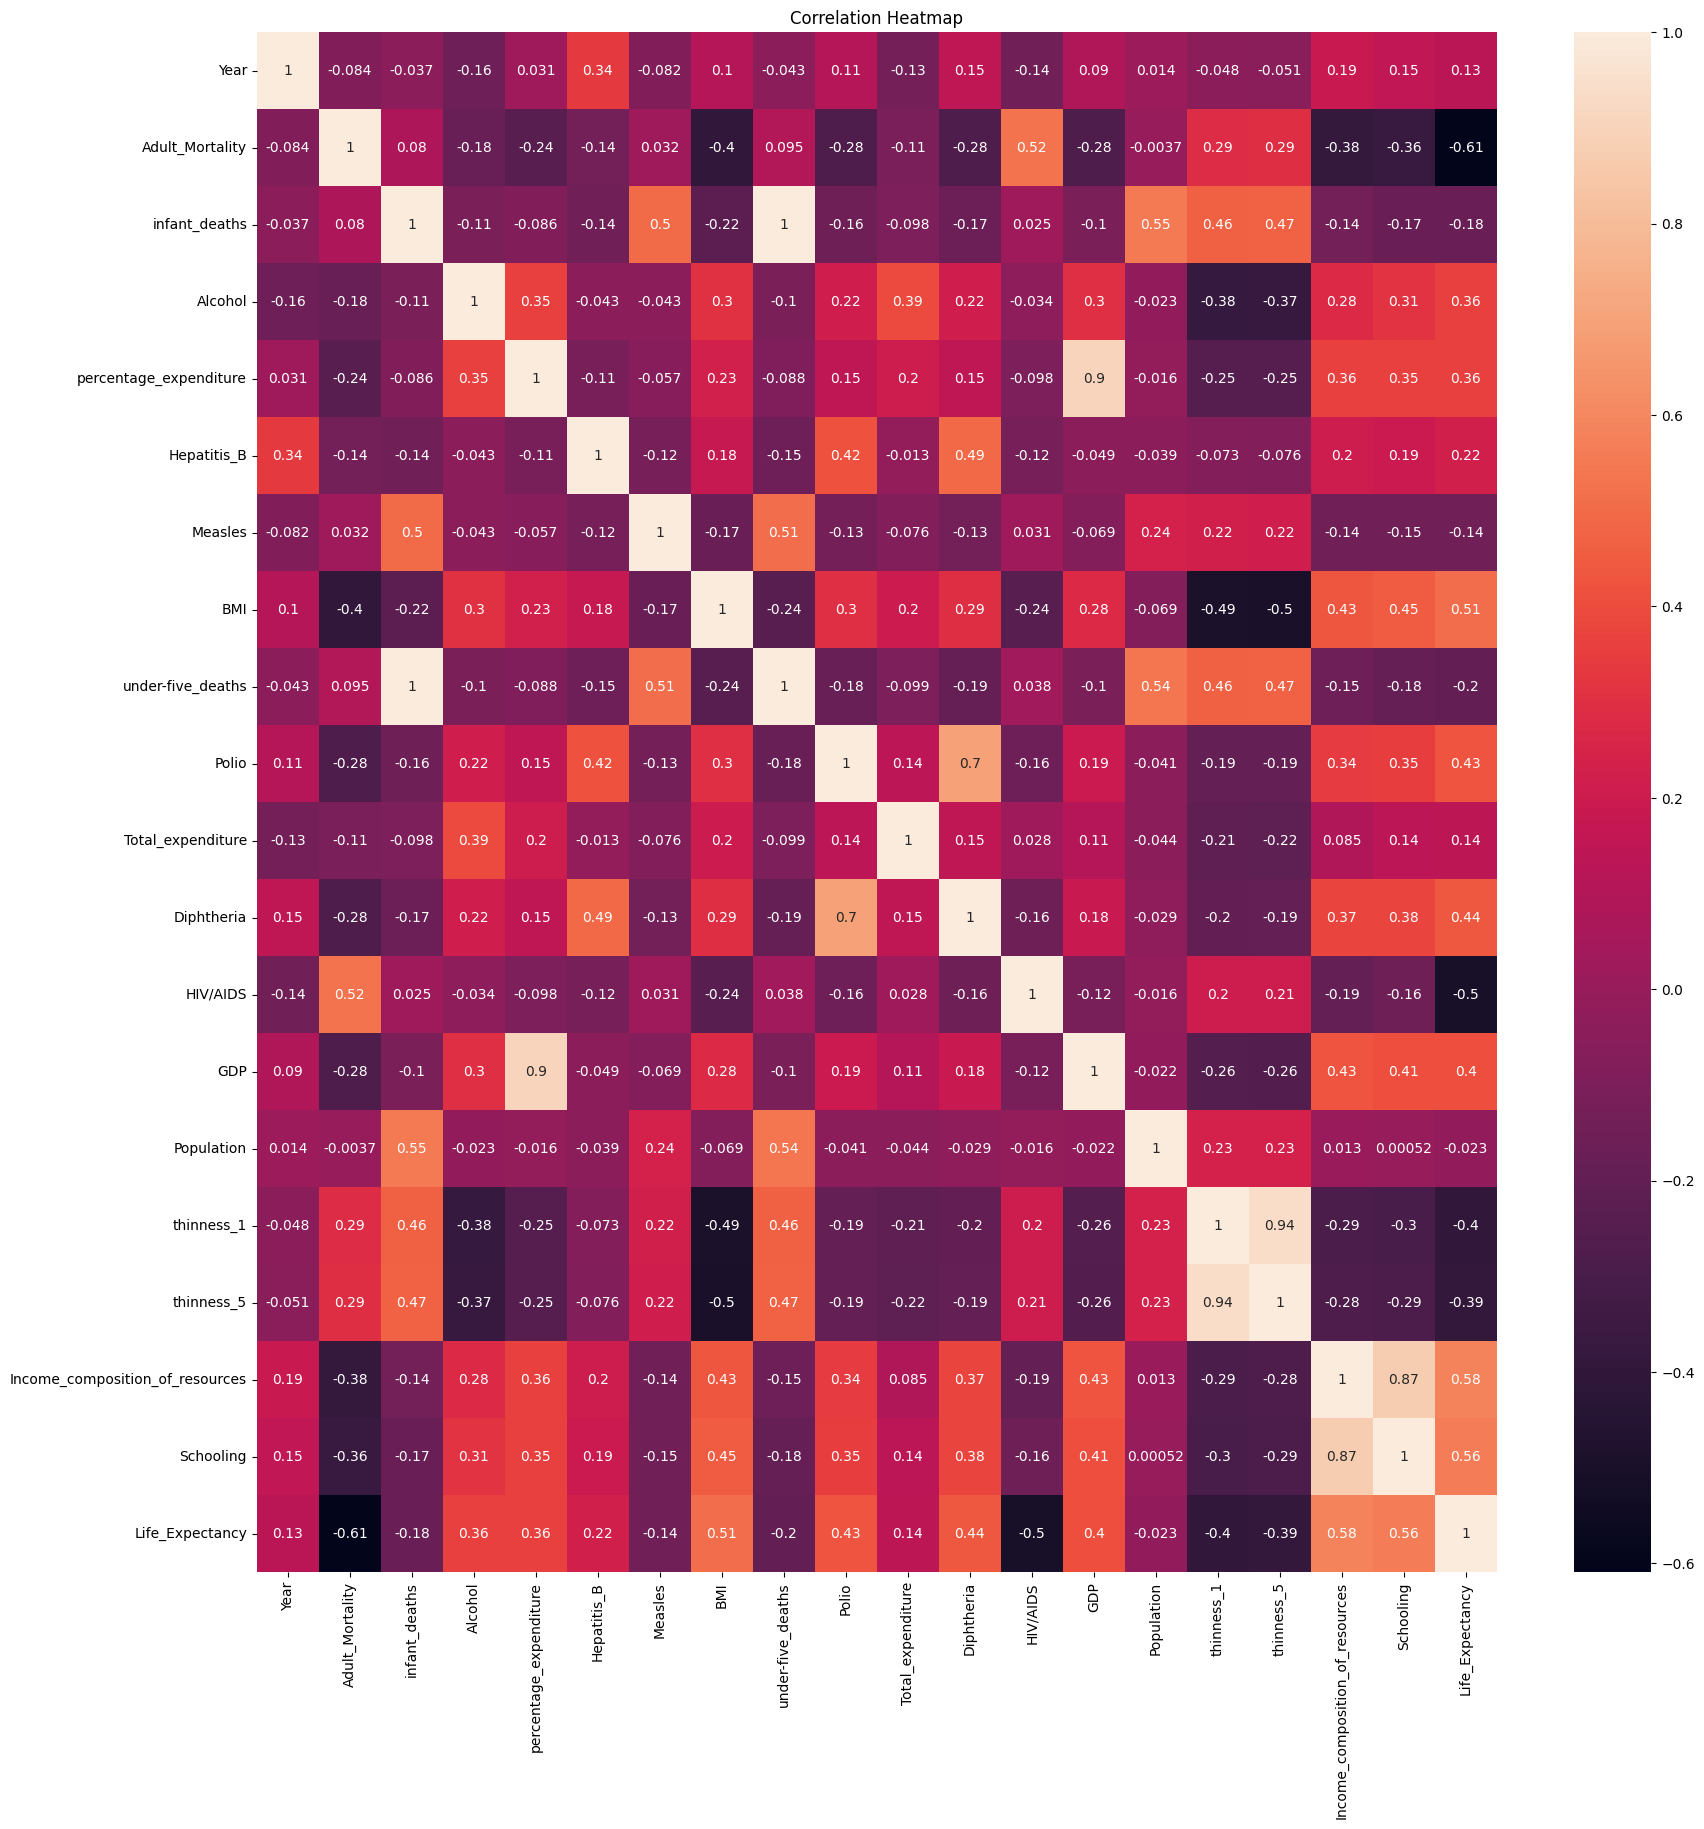

In [36]:
corr_matrix = df.toPandas().corr()

# Plot the correlation heatmap using Matplotlib and Seaborn
plt.figure(figsize=(20, 20))
ax = plt.subplot()
sns.heatmap(corr_matrix, annot=True, ax=ax)
plt.title("Correlation Heatmap")
plt.show()

In [37]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [38]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [39]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").
            fit(df) for column in list(set(df.columns)) ]

pipeline = Pipeline(stages=indexers)
df_r = pipeline.fit(df).transform(df)

df_r.show()

+-----------+----+----------+---------------+-------------+-------+----------------------+-----------+-------+----+-----------------+-----+-----------------+----------+--------+-----------+-----------+----------+----------+-------------------------------+---------+---------------+-------------------+-----------------------+---------------------+-------------+----------------+----------+---------+----------------+-----------------+----------------+---------------------+----------------+-----------+---------+----------------------------+--------------+---------------+-------------+-------------+-----------------------+-------------------------------------+------------+
|    Country|Year|    Status|Adult_Mortality|infant_deaths|Alcohol|percentage_expenditure|Hepatitis_B|Measles| BMI|under-five_deaths|Polio|Total_expenditure|Diphtheria|HIV/AIDS|        GDP| Population|thinness_1|thinness_5|Income_composition_of_resources|Schooling|Life_Expectancy|infant_deaths_index|under-five_deaths_index

In [40]:
assembler = VectorAssembler(inputCols = ['Year','Alcohol','Hepatitis_B','BMI','Polio','Total_expenditure','Diphtheria','GDP','Population',
                 'thinness_1','thinness_5','Income_composition_of_resources','Schooling'], outputCol='features')
output = assembler.transform(df)
output.show(3)

+-----------+----+----------+---------------+-------------+-------+----------------------+-----------+-------+----+-----------------+-----+-----------------+----------+--------+----------+-----------+----------+----------+-------------------------------+---------+---------------+--------------------+
|    Country|Year|    Status|Adult_Mortality|infant_deaths|Alcohol|percentage_expenditure|Hepatitis_B|Measles| BMI|under-five_deaths|Polio|Total_expenditure|Diphtheria|HIV/AIDS|       GDP| Population|thinness_1|thinness_5|Income_composition_of_resources|Schooling|Life_Expectancy|            features|
+-----------+----+----------+---------------+-------------+-------+----------------------+-----------+-------+----+-----------------+-----+-----------------+----------+--------+----------+-----------+----------+----------+-------------------------------+---------+---------------+--------------------+
|Afghanistan|2015|Developing|          263.0|           62|   0.01|           71.27962362|    

In [41]:
final_data = output.select(['features', 'Life_Expectancy'])
final_data.show(3)

+--------------------+---------------+
|            features|Life_Expectancy|
+--------------------+---------------+
|[2015.0,0.01,65.0...|           65.0|
|[2014.0,0.01,62.0...|           59.9|
|[2013.0,0.01,64.0...|           59.9|
+--------------------+---------------+
only showing top 3 rows



In [42]:
train, test = final_data.randomSplit([0.7, 0.3])

In [43]:
train.describe().show()

+-------+------------------+
|summary|   Life_Expectancy|
+-------+------------------+
|  count|              2045|
|   mean|  69.0117848410759|
| stddev|10.520655900651203|
|    min|               0.0|
|    max|              89.0|
+-------+------------------+



In [44]:
test.describe().show()

+-------+-----------------+
|summary|  Life_Expectancy|
+-------+-----------------+
|  count|              893|
|   mean|68.93784994400903|
| stddev|9.876289759213792|
|    min|              0.0|
|    max|             89.0|
+-------+-----------------+



In [45]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from datetime import datetime as dt

multi_evaluator = MulticlassClassificationEvaluator(labelCol = 'Life_Expectancy', metricName = 'accuracy')

In [66]:
# Multiple Linear Regression
from pyspark.ml.regression import LinearRegression
start = dt.now()
Lr = LinearRegression(labelCol = 'Life_Expectancy', featuresCol = 'features')
Lr_model = Lr.fit(train)
running_secs_Lr_spark = (dt.now() - start).microseconds
Lr_predictions = Lr_model.transform(test)
#print('Linear Regression Accuracy:', multi_evaluator.evaluate(Lr_predictions))
print('Time requred to run the algorithm:', running_secs_Lr_spark,' MicroSeconds.')

Time requred to run the algorithm: 343967  MicroSeconds.


In [67]:
#Random Forest Regressor
from pyspark.ml.regression import RandomForestRegressor
start = dt.now()
Rr = RandomForestRegressor(labelCol = 'Life_Expectancy', featuresCol = 'features', numTrees=100, maxDepth=5)
Rr_model = Rr.fit(train)
running_secs_Rr_spark = (dt.now() - start).microseconds
Rr_predictions = Rr_model.transform(test)
#print('Linear Regression Accuracy:', multi_evaluator.evaluate(Rr_predictions))
print('Time requred to run the algorithm:', running_secs_Rr_spark,' MicroSeconds.')

Time requred to run the algorithm: 428296  MicroSeconds.


Machine Learning Algorithms using Python

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [70]:
life = pd.read_csv("/content/drive/MyDrive/LifeExpectancy.csv")
life.drop(["Country", "Status"], axis=1, inplace=True)
x = life.drop("Life_Expectancy",axis=1)
y = life["Life_Expectancy"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
start = dt.now()
lm = LinearRegression()
model = lm.fit(x_train,y_train)
running_secs_Lr_python = (dt.now() - start).microseconds
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
score = model.score(x_train, y_train)
#print('Model Score:',score)
print('Time requred to run the algorithm:', running_secs_Lr_python,' MicroSeconds.')

Time requred to run the algorithm: 8028  MicroSeconds.


In [71]:
Rfr = RandomForestRegressor(n_estimators=100, random_state=42)
model = Rfr.fit(x_train,y_train)
running_secs_Rr_python = (dt.now() - start).microseconds
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
score = model.score(x_train, y_train)
#print('Model Score:',score)
print('Time requred to run the algorithm:', running_secs_Rr_python,' MicroSeconds.')

Time requred to run the algorithm: 339596  MicroSeconds.


In [80]:
time_comparision = pd.DataFrame({"LR in spark":[running_secs_Lr_spark],
                                 "RR in spark":[running_secs_Rr_spark],
                                 "LR in python":[running_secs_Lr_python],
                                 "RR in python":[running_secs_Rr_python]},
                                index=["Time"])
time_comparision

,LR in spark,RR in spark,LR in python,RR in python
Time,343967,428296,8028,339596


Text(0, 0.5, 'Time')

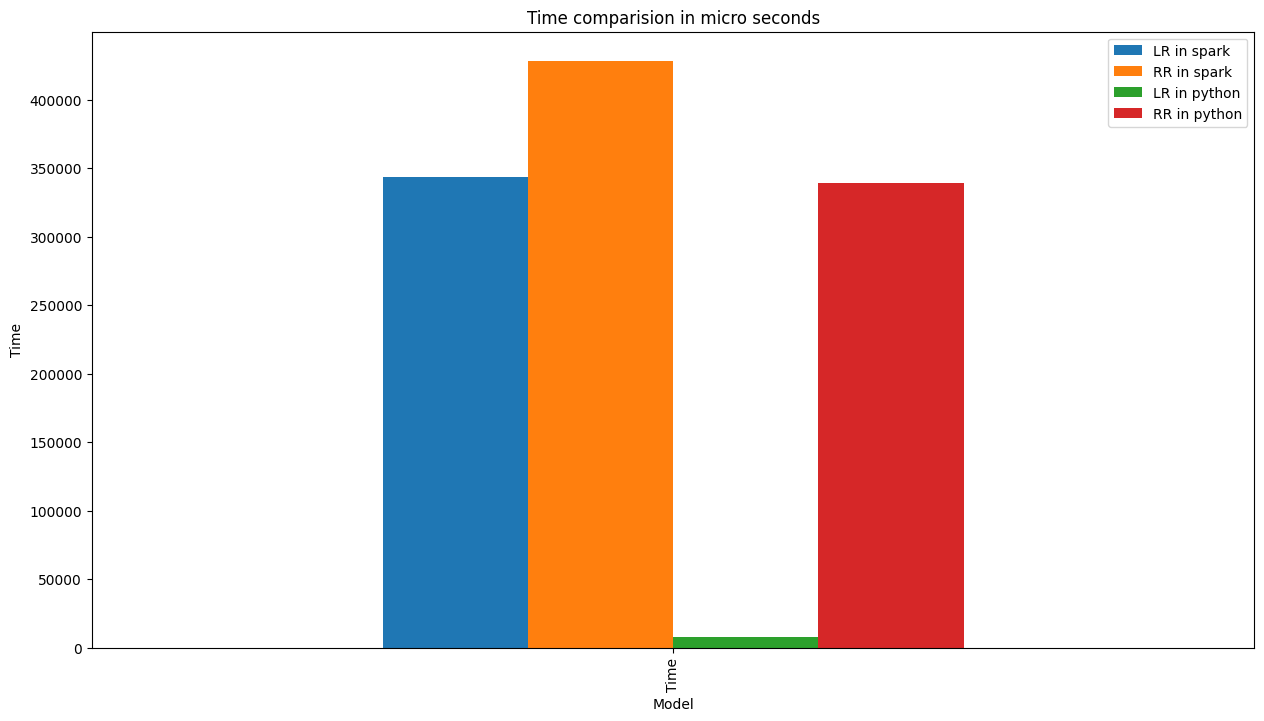

In [81]:
time_comparision.plot(kind="bar",figsize=(15, 8))

plt.title("Time comparision in micro seconds")

plt.xlabel("Model")

plt.ylabel("Time")

In [51]:
life = sc.textFile("/content/drive/MyDrive/LifeExpectancy.csv")
life.collect()

['Country,Year,Status,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1,thinness_5,Income_composition_of_resources,Schooling,Life_Expectancy',
 'Afghanistan,2015,Developing,263.0,62,0.01,71.27962362,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.25921,33736494.0,17.2,17.3,0.479,10.1,65.0',
 'Afghanistan,2014,Developing,271.0,64,0.01,73.52358168,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9',
 'Afghanistan,2013,Developing,268.0,66,0.01,73.21924272,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.47,9.9,59.9',
 'Afghanistan,2012,Developing,272.0,69,0.01,78.1842153,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959,3696958.0,17.9,18.0,0.463,9.8,59.5',
 'Afghanistan,2011,Developing,275.0,71,0.01,7.097108703,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2',
 'Afghanistan,2010,Developing,279.0,

In [52]:
life = life.map(lambda line:line.split(","))
life.collect()

[['Country',
  'Year',
  'Status',
  'Adult_Mortality',
  'infant_deaths',
  'Alcohol',
  'percentage_expenditure',
  'Hepatitis_B',
  'Measles',
  'BMI',
  'under-five_deaths',
  'Polio',
  'Total_expenditure',
  'Diphtheria',
  'HIV/AIDS',
  'GDP',
  'Population',
  'thinness_1',
  'thinness_5',
  'Income_composition_of_resources',
  'Schooling',
  'Life_Expectancy'],
 ['Afghanistan',
  '2015',
  'Developing',
  '263.0',
  '62',
  '0.01',
  '71.27962362',
  '65.0',
  '1154',
  '19.1',
  '83',
  '6.0',
  '8.16',
  '65.0',
  '0.1',
  '584.25921',
  '33736494.0',
  '17.2',
  '17.3',
  '0.479',
  '10.1',
  '65.0'],
 ['Afghanistan',
  '2014',
  'Developing',
  '271.0',
  '64',
  '0.01',
  '73.52358168',
  '62.0',
  '492',
  '18.6',
  '86',
  '58.0',
  '8.18',
  '62.0',
  '0.1',
  '612.696514',
  '327582.0',
  '17.5',
  '17.5',
  '0.476',
  '10.0',
  '59.9'],
 ['Afghanistan',
  '2013',
  'Developing',
  '268.0',
  '66',
  '0.01',
  '73.21924272',
  '64.0',
  '430',
  '18.1',
  '89',
  '62.

In [53]:
life = life.map(lambda record:(record[0],record[1],record[2],record[3],record[4],record[5],record[6],record[7],record[8],record[9],record[10],
                record[11],record[12],record[13],record[14],record[15],record[16],record[17],record[18],record[19],record[20],record[21]))
life.collect()

[('Country',
  'Year',
  'Status',
  'Adult_Mortality',
  'infant_deaths',
  'Alcohol',
  'percentage_expenditure',
  'Hepatitis_B',
  'Measles',
  'BMI',
  'under-five_deaths',
  'Polio',
  'Total_expenditure',
  'Diphtheria',
  'HIV/AIDS',
  'GDP',
  'Population',
  'thinness_1',
  'thinness_5',
  'Income_composition_of_resources',
  'Schooling',
  'Life_Expectancy'),
 ('Afghanistan',
  '2015',
  'Developing',
  '263.0',
  '62',
  '0.01',
  '71.27962362',
  '65.0',
  '1154',
  '19.1',
  '83',
  '6.0',
  '8.16',
  '65.0',
  '0.1',
  '584.25921',
  '33736494.0',
  '17.2',
  '17.3',
  '0.479',
  '10.1',
  '65.0'),
 ('Afghanistan',
  '2014',
  'Developing',
  '271.0',
  '64',
  '0.01',
  '73.52358168',
  '62.0',
  '492',
  '18.6',
  '86',
  '58.0',
  '8.18',
  '62.0',
  '0.1',
  '612.696514',
  '327582.0',
  '17.5',
  '17.5',
  '0.476',
  '10.0',
  '59.9'),
 ('Afghanistan',
  '2013',
  'Developing',
  '268.0',
  '66',
  '0.01',
  '73.21924272',
  '64.0',
  '430',
  '18.1',
  '89',
  '62.

In [60]:
Country_Max = life.map(lambda val:(val[0],val[21])).reduceByKey(lambda a,b:max(a,b))

In [61]:
Country_Max.collect()

[('Country', 'Life_Expectancy'),
 ('Albania', '77.8'),
 ('Algeria', '75.6'),
 ('Angola', '56.0'),
 ('Argentina', '76.3'),
 ('Australia', '86.0'),
 ('Austria', '88.0'),
 ('Bahrain', '76.9'),
 ('Barbados', '75.5'),
 ('Belgium', '89.0'),
 ('Belize', '71.0'),
 ('Bhutan', '69.8'),
 ('Botswana', '65.7'),
 ('Brazil', '75.0'),
 ('Brunei Darussalam', '78.3'),
 ('Cabo Verde', '77.0'),
 ('Cambodia', '68.7'),
 ('China', '76.1'),
 ('Congo', '68.0'),
 ('Cook Islands', '0.0'),
 ('Costa Rica', '79.6'),
 ('Cyprus', '85.0'),
 ("Democratic People's Republic of Korea", '76.0'),
 ('Denmark', '86.0'),
 ('Ecuador', '76.2'),
 ('El Salvador', '75.0'),
 ('Equatorial Guinea', '58.2'),
 ('Eritrea', '67.0'),
 ('Estonia', '78.0'),
 ('Ethiopia', '68.0'),
 ('Fiji', '69.9'),
 ('Finland', '89.0'),
 ('France', '89.0'),
 ('Gabon', '66.0'),
 ('Ghana', '69.0'),
 ('Greece', '88.0'),
 ('Guatemala', '79.0'),
 ('Guinea-Bissau', '58.9'),
 ('Honduras', '74.6'),
 ('Hungary', '75.8'),
 ('Iceland', '88.0'),
 ('India', '68.3'),
 ('I

In [64]:
Average_Life_Expectancy = life.map(lambda val:(val[0],val[21])).reduceByKey(lambda a,b:min(a,b))

In [65]:
Average_Life_Expectancy.collect()

[('Country', 'Life_Expectancy'),
 ('Albania', '72.6'),
 ('Algeria', '71.3'),
 ('Angola', '45.3'),
 ('Argentina', '74.0'),
 ('Australia', '79.5'),
 ('Austria', '78.1'),
 ('Bahrain', '74.5'),
 ('Barbados', '73.3'),
 ('Belgium', '77.6'),
 ('Belize', '68.2'),
 ('Bhutan', '61.7'),
 ('Botswana', '46.0'),
 ('Brazil', '71.0'),
 ('Brunei Darussalam', '74.4'),
 ('Cabo Verde', '69.9'),
 ('Cambodia', '57.7'),
 ('China', '71.7'),
 ('Congo', '52.6'),
 ('Cook Islands', '0.0'),
 ('Costa Rica', '77.5'),
 ('Cyprus', '78.1'),
 ("Democratic People's Republic of Korea", '65.4'),
 ('Denmark', '76.9'),
 ('Ecuador', '72.8'),
 ('El Salvador', '68.9'),
 ('Equatorial Guinea', '52.7'),
 ('Eritrea', '45.3'),
 ('Estonia', '71.2'),
 ('Ethiopia', '51.2'),
 ('Fiji', '67.7'),
 ('Finland', '77.5'),
 ('France', '78.8'),
 ('Gabon', '59.7'),
 ('Ghana', '57.2'),
 ('Greece', '78.2'),
 ('Guatemala', '67.7'),
 ('Guinea-Bissau', '52.1'),
 ('Honduras', '71.0'),
 ('Hungary', '71.7'),
 ('Iceland', '79.7'),
 ('India', '62.5'),
 ('I